# Projet : Détection de la dépression chez les étudiants

**Objectif** : Prédire si une personne est en dépression à partir de données cliniques et socio-professionnelles.

---

## Métriques de performance

Les classes sont **fortement déséquilibrées** : 18% de cas de dépression, 82% de cas non-dépressifs.

- **Recall (sensibilité)** : TP / (TP + FN) → éviter de **manquer un cas positif**  
- **Precision (précision)** : TP / (TP + FP) → limiter les **faux positifs**  
- **F1-score** → compromis entre précision et recall

**Objectif ciblé :** F1 ≈ 0.5 et Recall ≈ 0.7

---

# Résumé des principaux insights (EDA)

- Classes déséquilibrées : 18% dépressifs / 82% non-dépressifs  
- Étudiants plus touchés que les travailleurs  
- Tranche 20-30 ans particulièrement affectée  
- Pression académique et professionnelle plus élevée chez les déprimés  
- Hygiène de vie et Financial Stress semblent influencer la dépression  
- Lien fort entre idées suicidaires et dépression  
- Certaines variables ont >80% de NaN → à traiter avant modélisation

---
# Sommaire et Bilan de l'EDA
# 1. Analyse de la forme

### 1.1 Identification de la target
- Target : `Depression`

### 1.2 Types de variables
- 10 qualitatives, 10 quantitatives

### 1.3 Valeurs manquantes
- 3 variables avec >80% de NaN

### 1.4 Informations complémentaires
- Nombre de lignes et colonnes : 140,700 × 20  
- Groupes de données :
  - 80% → études (`Academic Pressure`, `CGPA`, `Study Satisfaction`)  
  - 20% → emploi (`Profession`, `Work Pressure`, `Job Satisfaction`)


# 2. Analyse du fond

### 2.1 Visualisation de la target
- 18% de cas de dépression  
- 82% de cas sains  

### 2.2 Compréhension des variables
- Variables continues : beaucoup de catégories chiffrées  
- Variables qualitatives : nombreuses catégories (noms, métiers, études), majoritairement des villes indiennes  
- Ratio étudiants/professeurs : 1/5 étudiants, 4/5 travailleurs  
- Âge : 20 à 60 ans  

### 2.3 Relations features-target

- **Job / target** :
  - Work Pressure plus élevée et Job Estimation plus faible chez les déprimés  
  - Heures de travail/study plus élevées chez les déprimés  
- **Age / target** :
  - Les 20-30 ans semblent plus affectés par la dépression  
- **Studies / target** :
  - Les étudiants sont plus déprimés que les travailleurs  
  - Beaucoup de ‘class 12’ dans les déprimés  
  - Academic Pressure plus forte chez les étudiants déprimés  
- **Hygiène de vie / target** :
  - Durée de sommeil et régime alimentaire semblent influencer la dépression  
  - Financial Stress plus élevé chez les déprimés  
- **Variables object** :
  - Fort lien entre idées suicidaires et dépression  

# 3. Analyse du fond complémentaire

### 3.1 Relation variables / variables
- Float / Float : très faible corrélation  
- Age / Float : très faible corrélation  
- Sommeil / Float : très faible corrélation  
- Working Professional or Student / Float :
  - 20-35 ans : majoritairement étudiants  
  - 35-60 ans : majoritairement travailleurs  

### 3.2 Analyse des valeurs manquantes (NaN)

### 3.3 Hypothèses nulles (H0)
- Objectif : tester si les durées de sommeil et régimes alimentaires diffèrent significativement chez les déprimés et les non-déprimés  
- H0 : durée de sommeil et régime alimentaire **égaux** pour les deux groupes  
- Résultat préliminaire : hypothèse rejetée (conversion des données en float nécessaire pour le test statistique)  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Chemin local vers les données
TRAIN_PATH = 'data/train.csv'

data = pd.read_csv(TRAIN_PATH)
df = data.copy()
df.head()

# **1. Analyse de la forme**

## **1.1 Identification de la target**

In [ ]:
target_feature='Depression'

In [ ]:
df.shape

(140700, 20)

## **1.2 Types de variables**

In [ ]:
df.dtypes.value_counts()

,count
object,10
float64,8
int64,2


In [ ]:
df.dtypes

,0
id,int64
Name,object
Gender,object
Age,float64
City,object
Working Professional or Student,object
Profession,object
Academic Pressure,float64
Work Pressure,float64
CGPA,float64


## **1.3 Valeurs manquantes**

<Axes: >

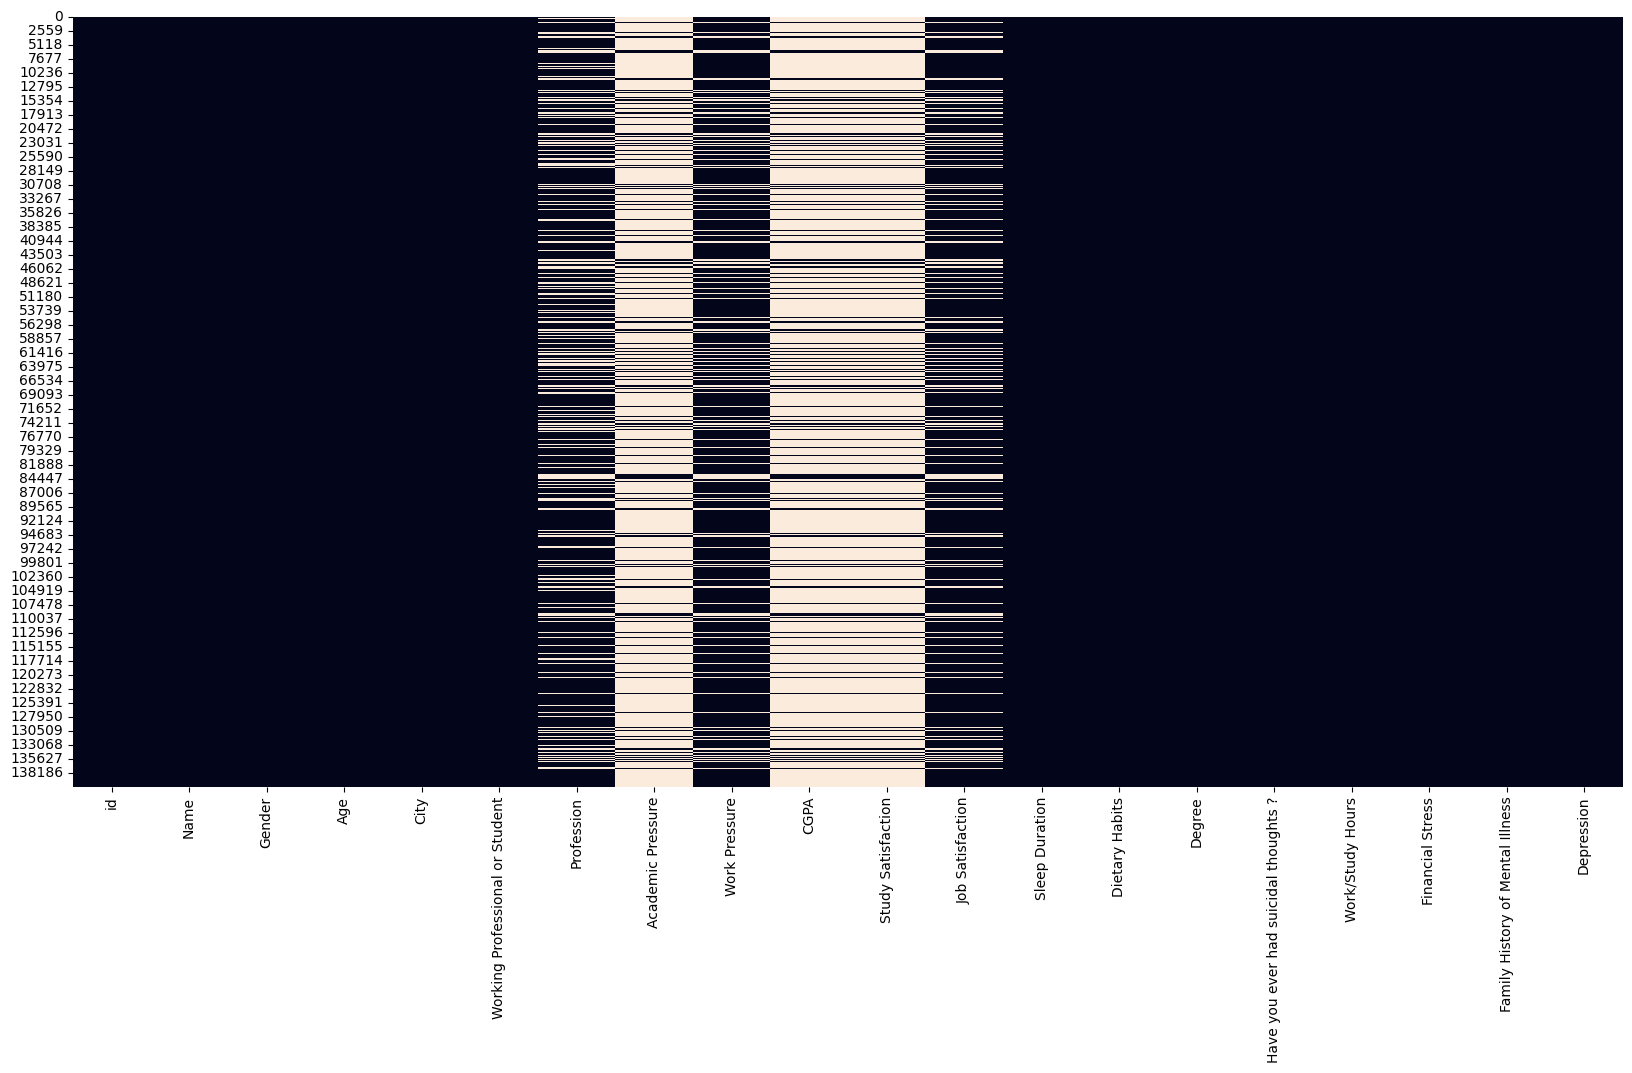

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)
#Valeurs manquantes en blanc

In [ ]:
print('Colonnes et pourcentage de valeurs manquantes :\n')
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

Colonnes et pourcentage de valeurs manquantes :



,0
Study Satisfaction,0.801727
Academic Pressure,0.801727
CGPA,0.801720
Profession,0.260341
Work Pressure,0.198422
Job Satisfaction,0.198365
Financial Stress,0.000028
Dietary Habits,0.000028
Degree,0.000014
Gender,0.000000


# **2. Analyse du Fond**

#### **Elimination des colonnes inutiles**

In [ ]:
df.drop('id',axis=1,inplace=True)

## **2.1 Visualisation de la target**

In [ ]:
print(f'Répartition de {target_feature} :\n')
df[target_feature].value_counts(normalize=True)

Répartition de Depression :



,proportion
Depression,
0,0.818287
1,0.181713


## **2.2 Compréhension des variables**

### **A. Variables continues**

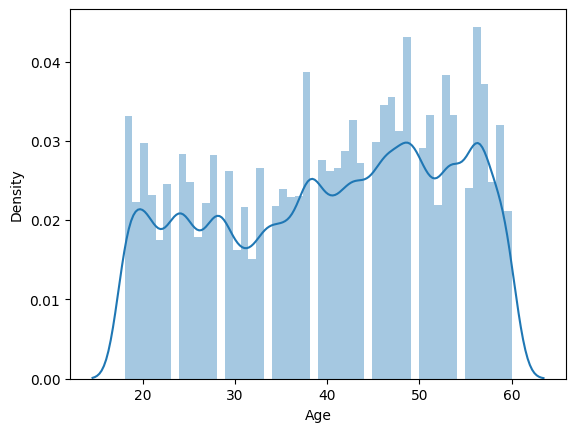

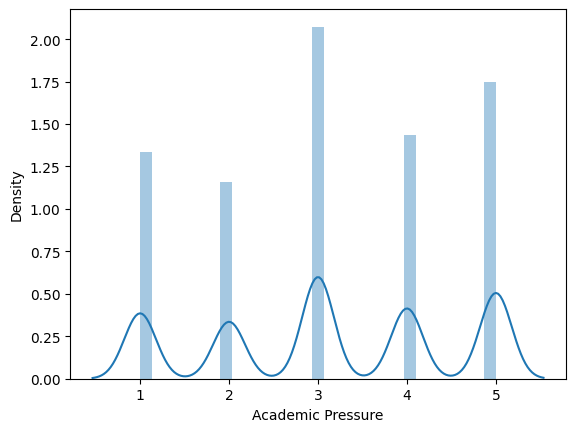

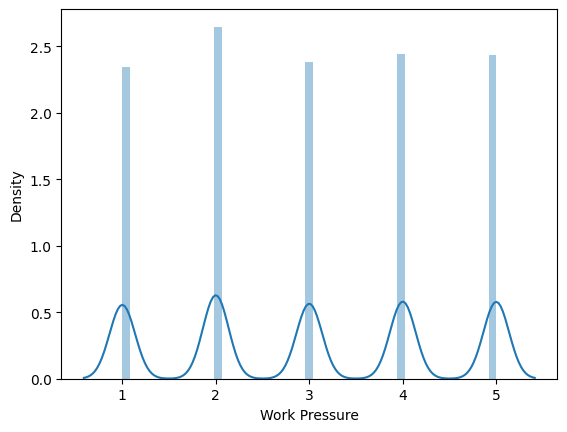

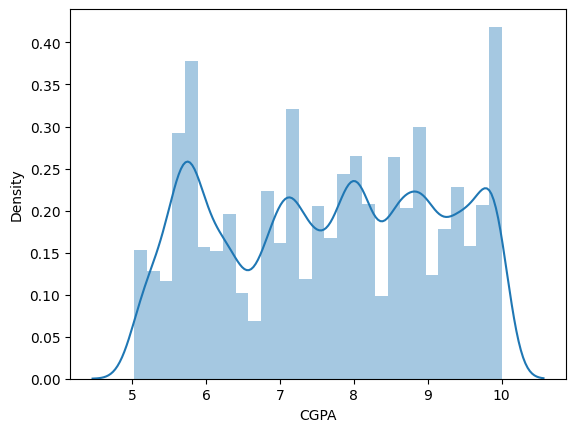

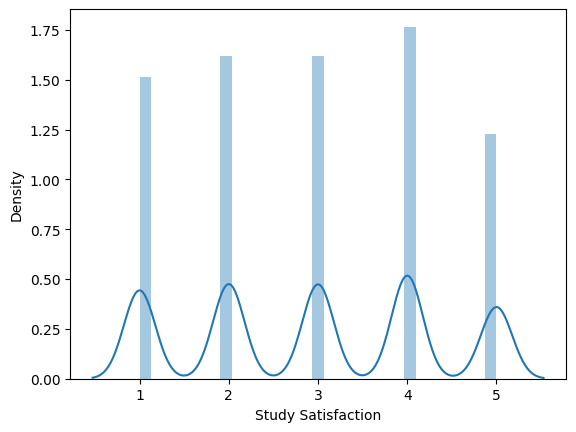

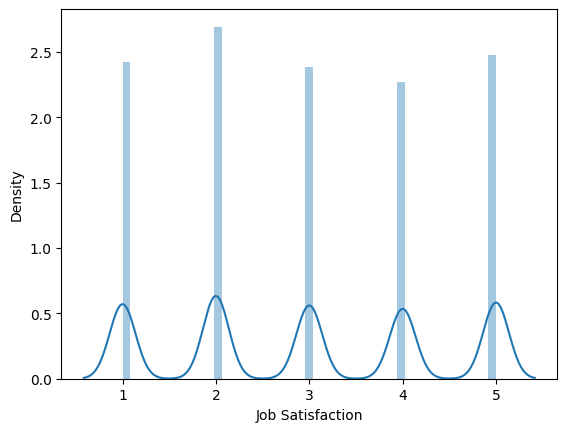

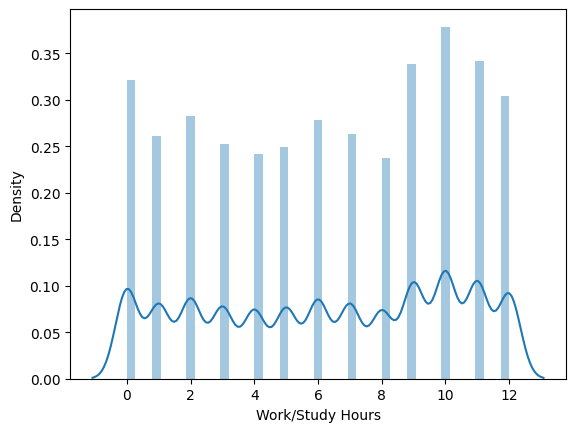

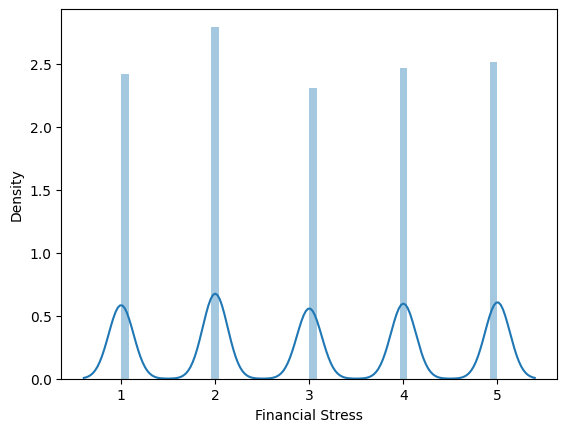

In [ ]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

#pas une bonne idée

### **B. Variables qualitatives**

In [ ]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50}{df[col].unique()}')

Name----------------------------------------------['Aaradhya' 'Vivan' 'Yuvraj' 'Rhea' 'Vani' 'Ritvik' 'Rajveer' 'Aishwarya'
 'Simran' 'Utkarsh' 'Aahana' 'Tejas' 'Aadhya' 'Kiran' 'Aditi' 'Suhani'
 'Jiya' 'Bhavesh' 'Armaan' 'Ishaani' 'Prachi' 'Pratyush' 'Abhinav'
 'Siddhesh' 'Aditya' 'Aarav' 'Asha' 'Kashish' 'Prisha' 'Chhavi' 'Tanmay'
 'Vihaan' 'Shiv' 'Anvi' 'Darsh' 'Samar' 'Raunak' 'Mahi' 'Shaurya' 'Vidya'
 'Jai' 'Ayush' 'Ansh' 'Anand' 'Yashvi' 'Shrey' 'Ritika' 'Mihir' 'Isha'
 'Arjun' 'Rohan' 'Pratham' 'Nirvaan' 'Ishaan' 'Aarya' 'Riya' 'Aariv'
 'Raghavendra' 'Mahika' 'Abhishek' 'Harshil' 'Janvi' 'Kartikeya' 'Shivam'
 'Advait' 'Reyansh' 'Saanvi' 'Ivaan' 'Pallavi' 'Sneha' 'Ayaan' 'Aakash'
 'Raghav' 'Satyam' 'Aarush' 'Vibha' 'Rupal' 'Sanya' 'Mira' 'Rashi' 'Shlok'
 'Harsha' 'Divya' 'Pranav' 'Hrithik' 'Tushar' 'Garima' 'Zoya' 'Kian'
 'Navya' 'Lakshay' 'Kriti' 'Palak' 'Aryan' 'Parth' 'Ishan' 'Rupak'
 'Atharv' 'Aarti' 'Anirudh' 'Kabir' 'Sanjeev' 'Sanket' 'Tara' 'Gagan'
 'Anjali' 'Gaurav' 'Vikr

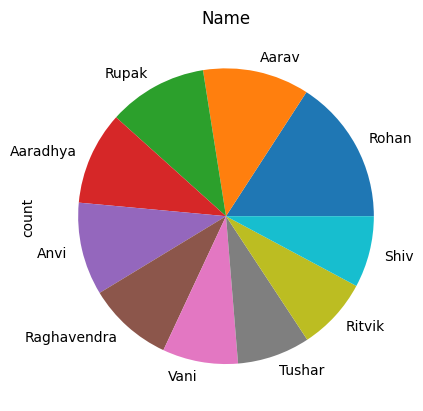

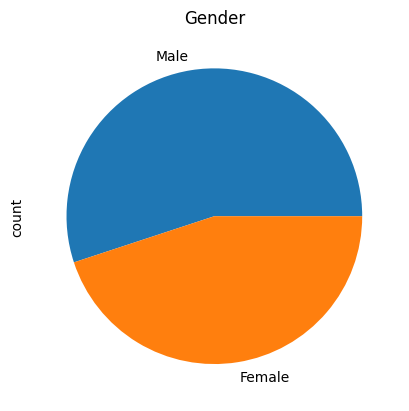

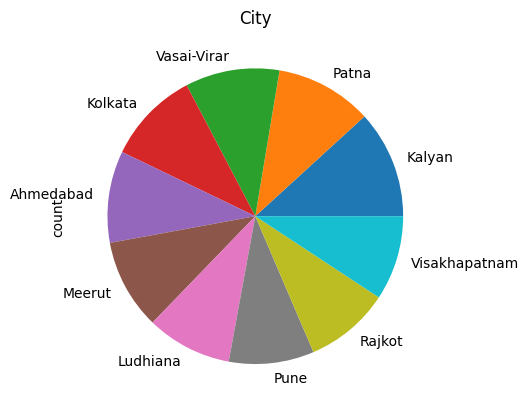

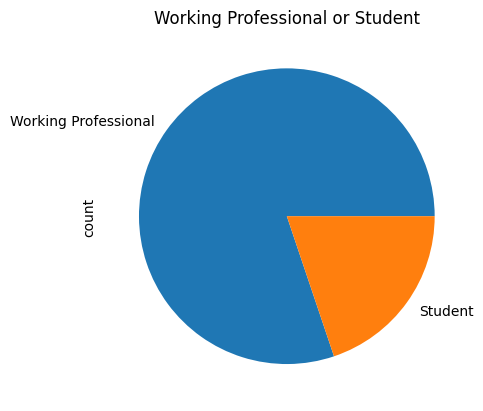

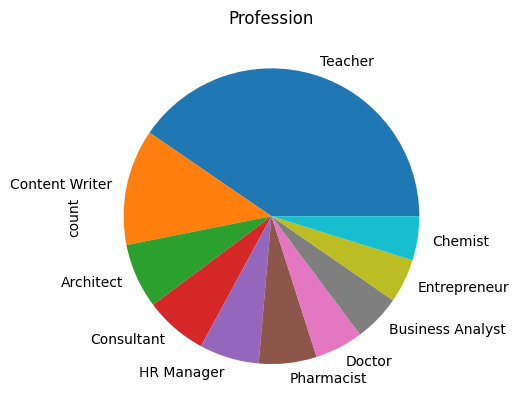

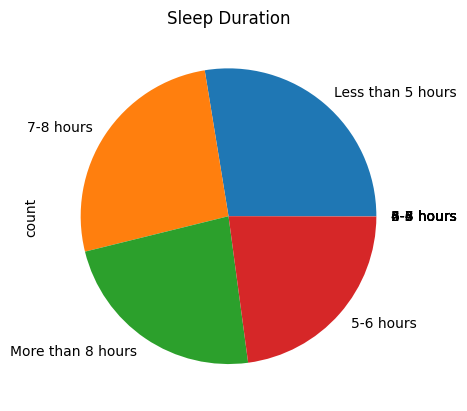

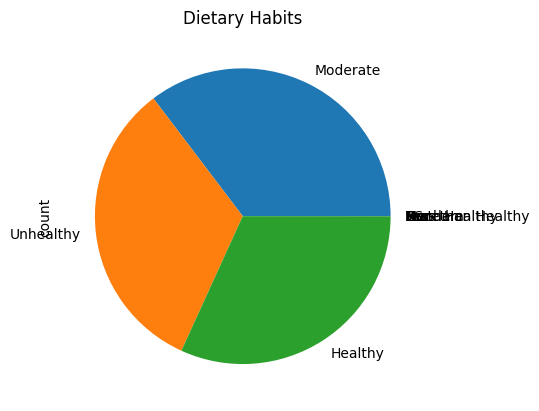

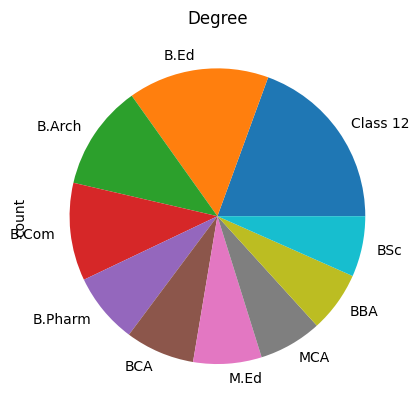

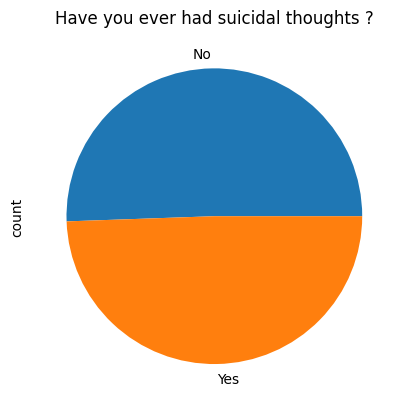

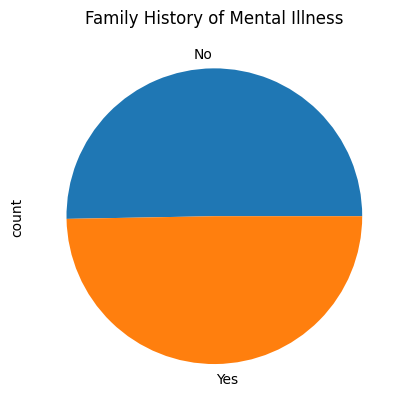

In [ ]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().sort_values(ascending=False)[:10].plot.pie()
    plt.title(col)

## **2.3 Relations features-target**
**Création de sous-ensembles positif et négatif**

In [ ]:
positive_df=df[df[target_feature]==1]
negative_df=df[df[target_feature]==0]

**Création des ensembles job et study**

In [ ]:
#'Profession',
job_columns=['Work Pressure', 'Job Satisfaction']
studies_columns=['Academic Pressure', 'CGPA','Study Satisfaction']

### **A. Job / target**

Text(0.5, 1.0, 'Profession')

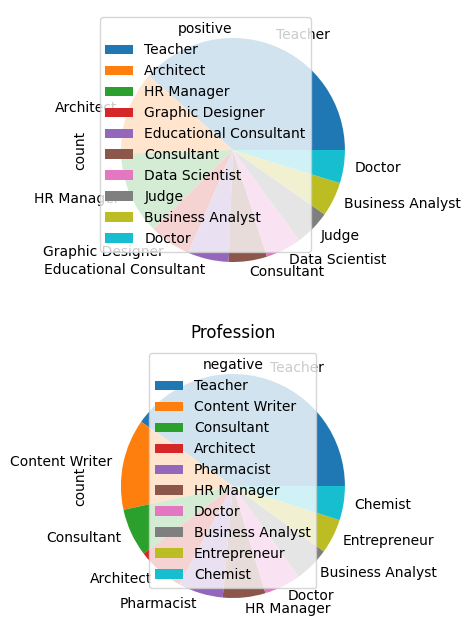

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
positive_df['Profession'].value_counts().sort_values(ascending=False)[:10].plot.pie()
plt.legend(title='positive')
plt.subplot(2,1,2)
negative_df['Profession'].value_counts().sort_values(ascending=False)[:10].plot.pie()
plt.legend(title='negative')
plt.title('Profession')

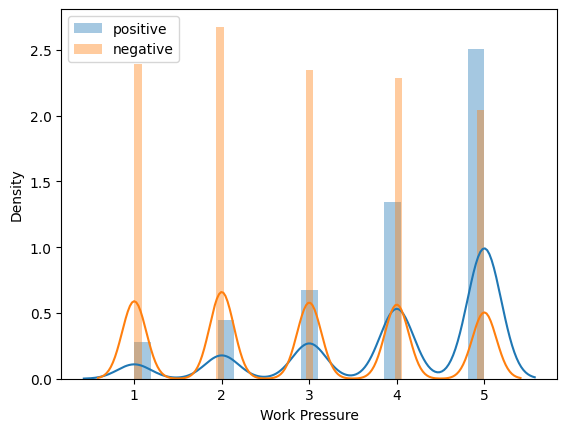

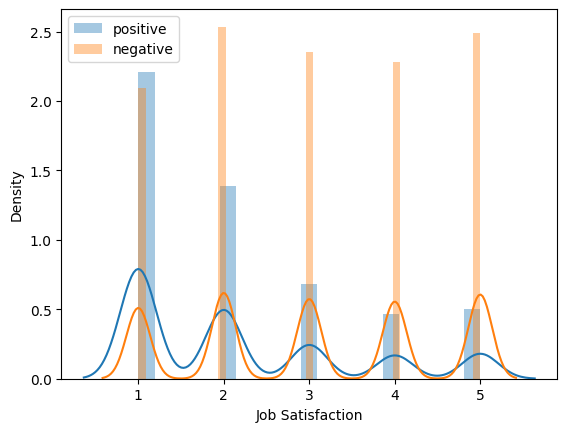

In [ ]:
for col in job_columns:
    plt.figure()
    sns.distplot(positive_df[col],label='positive')
    sns.distplot(negative_df[col],label='negative')
    plt.legend()

### **B. Age / target**

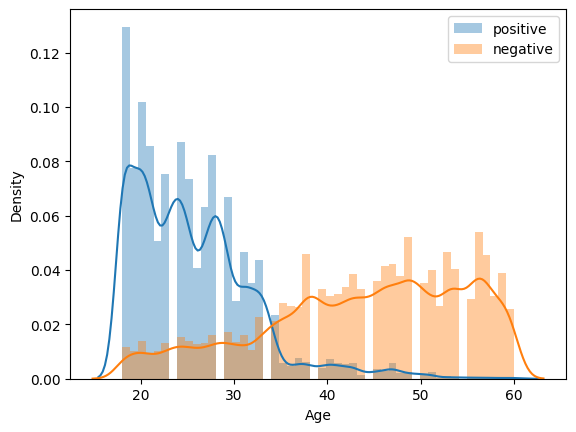

In [ ]:
plt.figure()
sns.distplot(positive_df['Age'],label='positive')
sns.distplot(negative_df['Age'],label='negative')
plt.legend()

**Création des ensembles object et float**

In [ ]:
float_columns = df.select_dtypes(include=['float']).columns
object_columns = df.select_dtypes(include=['object']).columns

### **C. Studies / target**

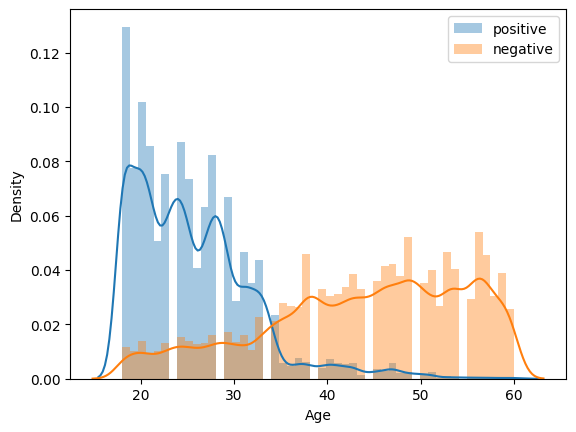

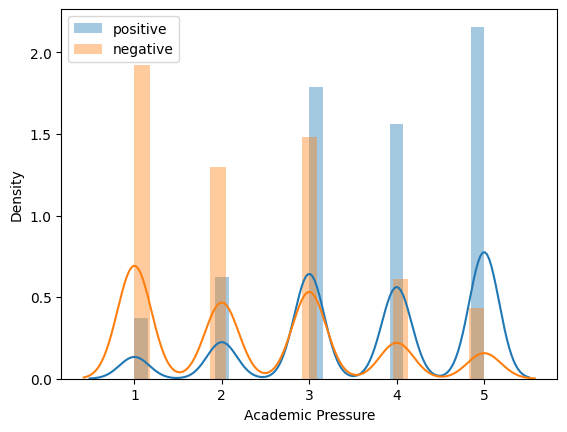

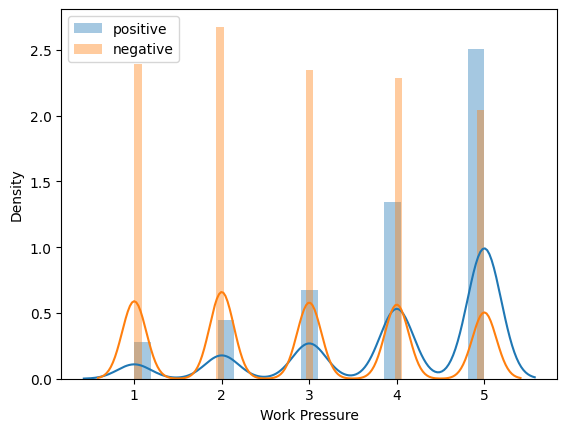

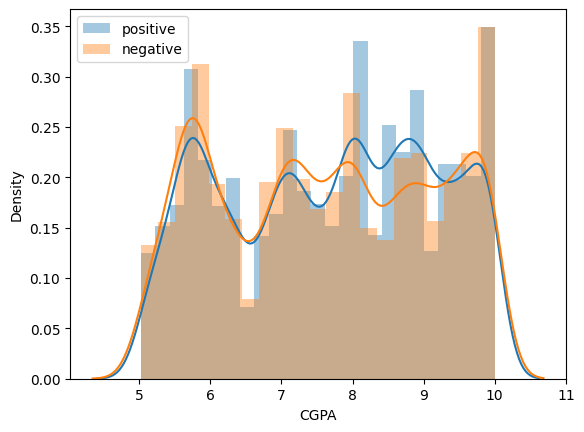

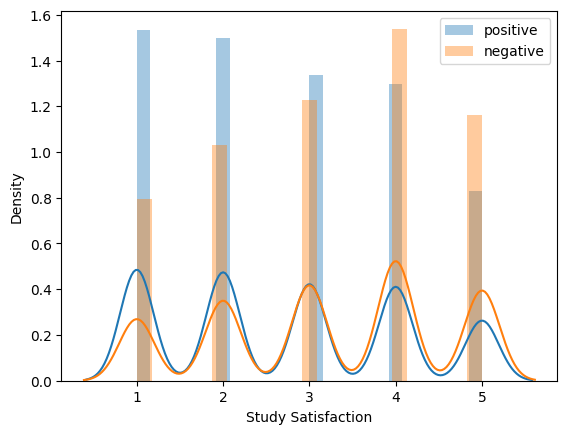

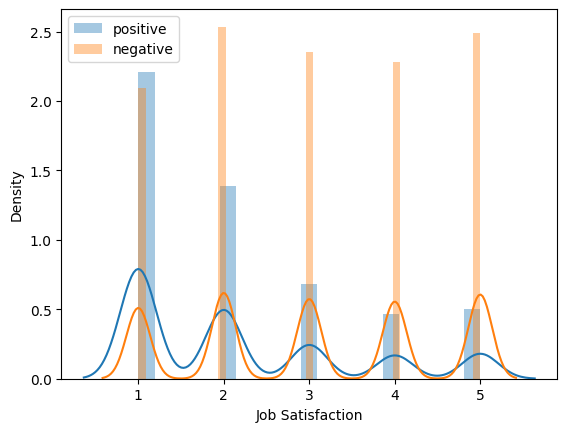

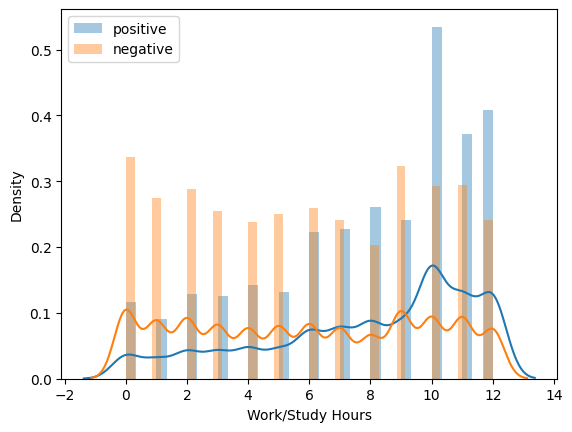

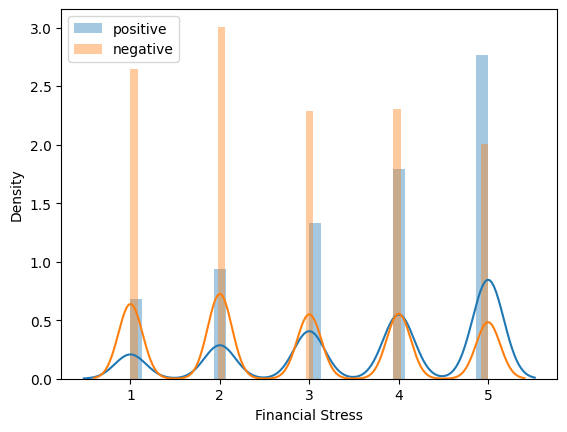

In [ ]:
for col in float_columns:
    plt.figure()
    sns.distplot(positive_df[col],label='positive')
    sns.distplot(negative_df[col],label='negative')
    plt.legend()

###**D. Hygiène de vie / target**

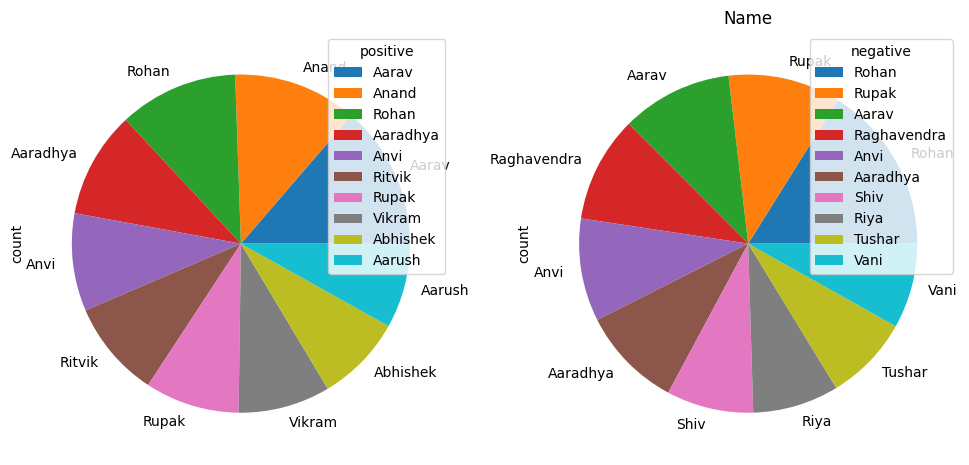

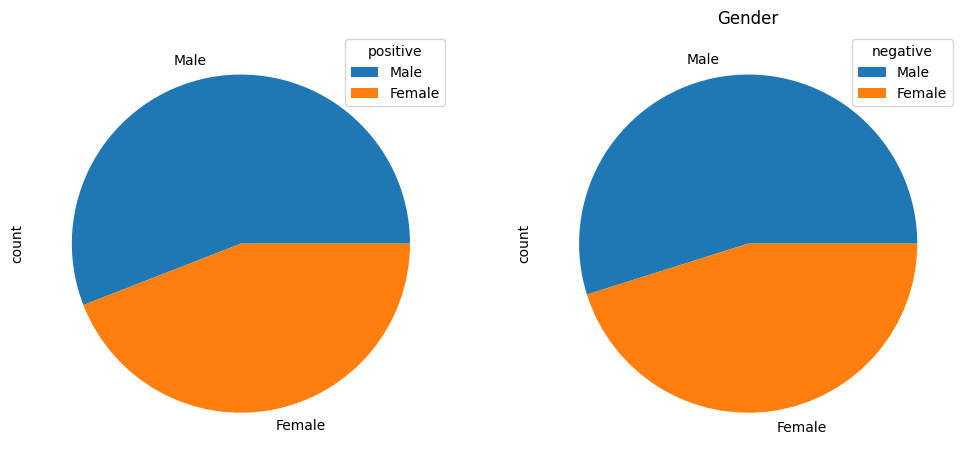

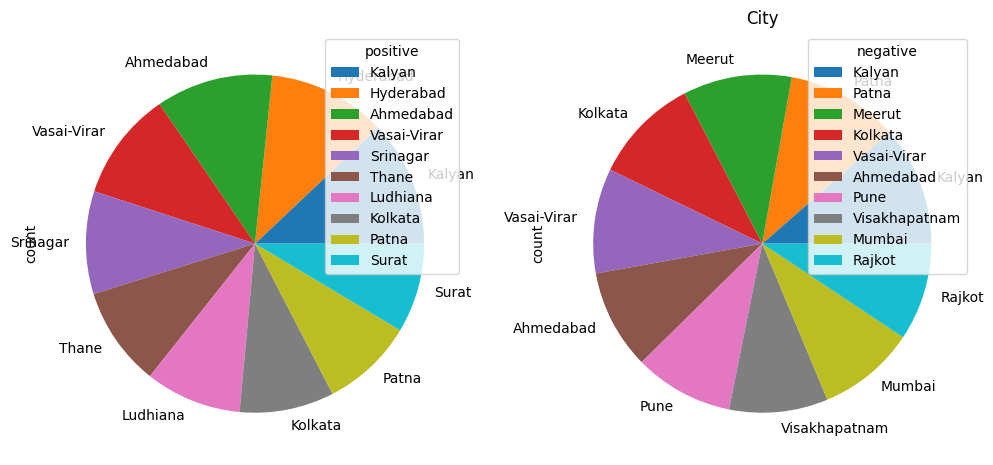

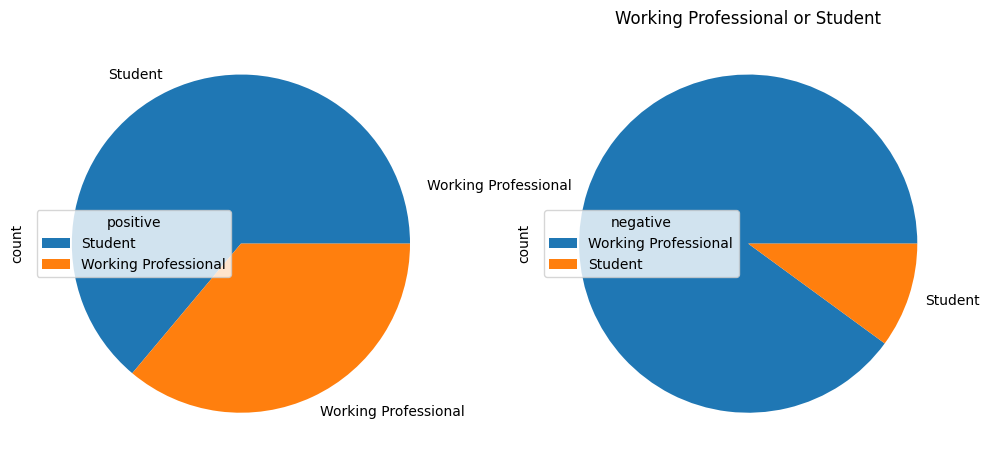

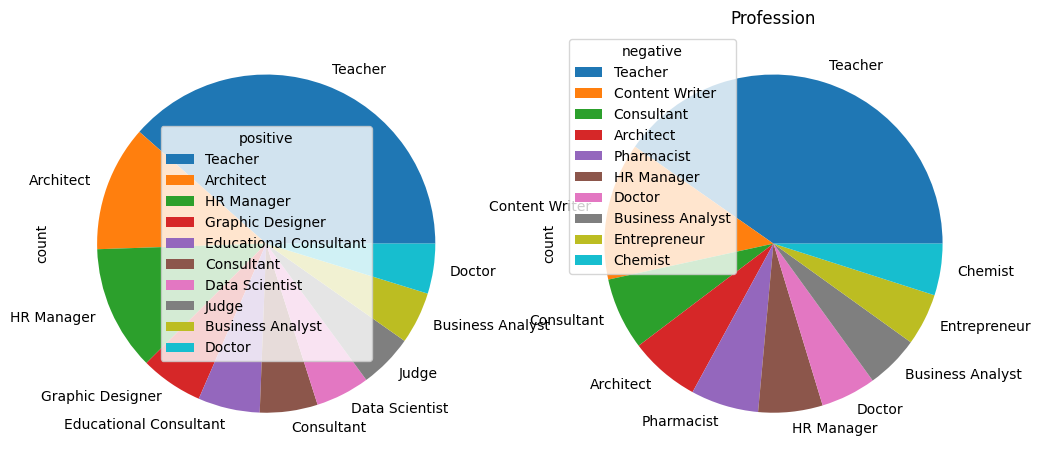

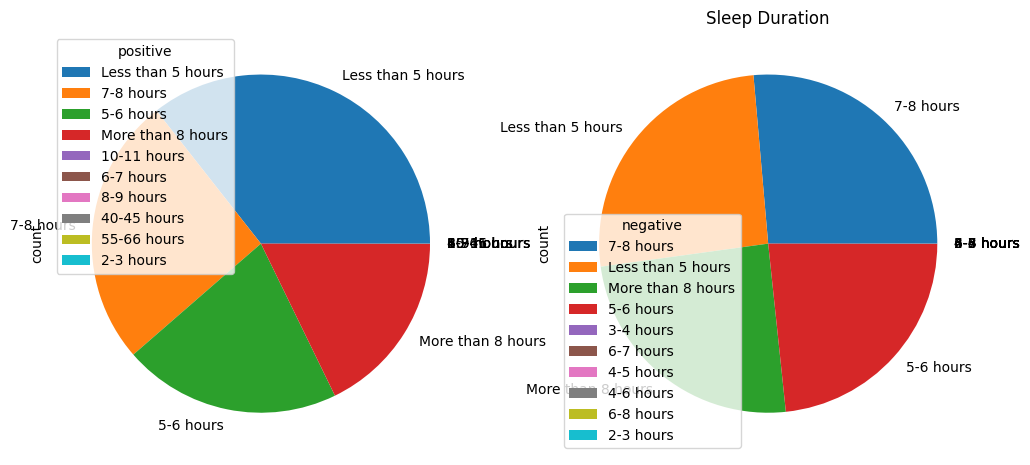

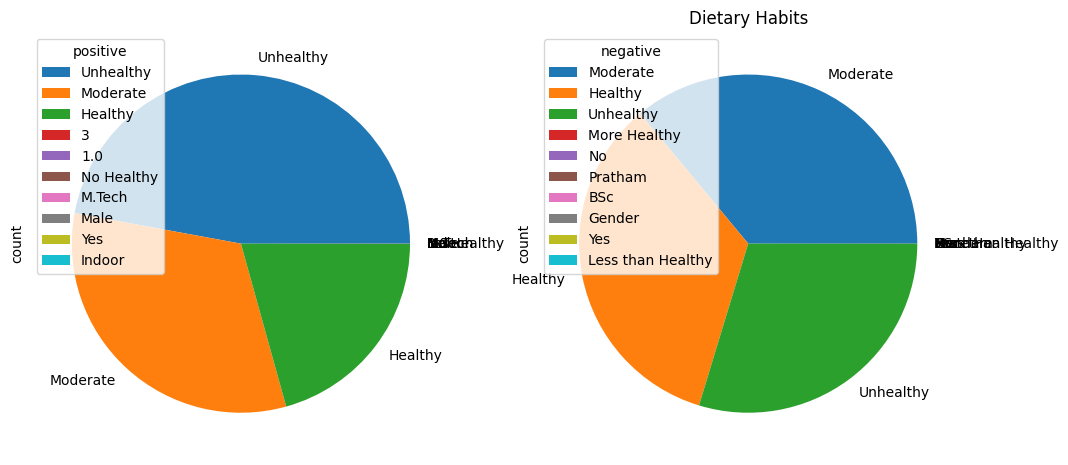

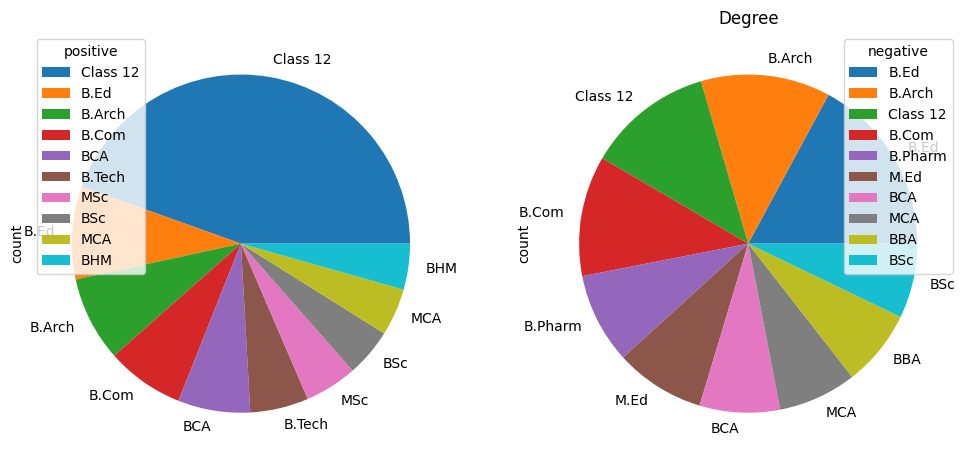

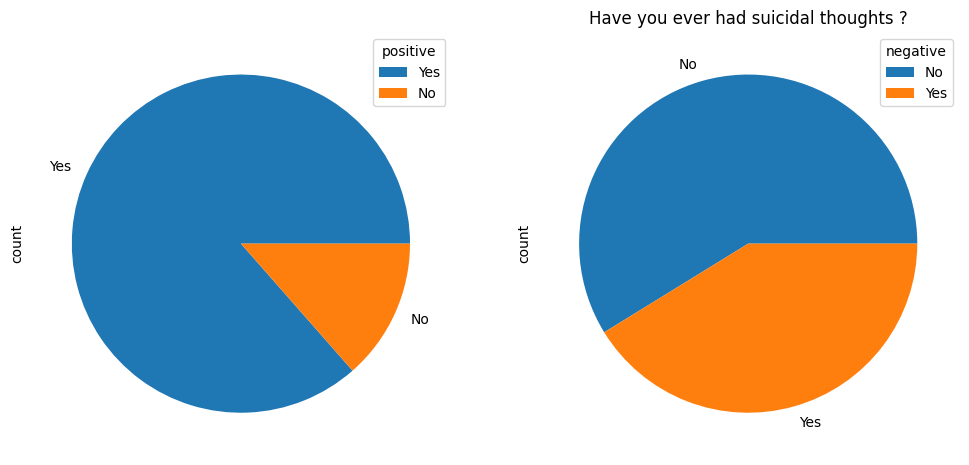

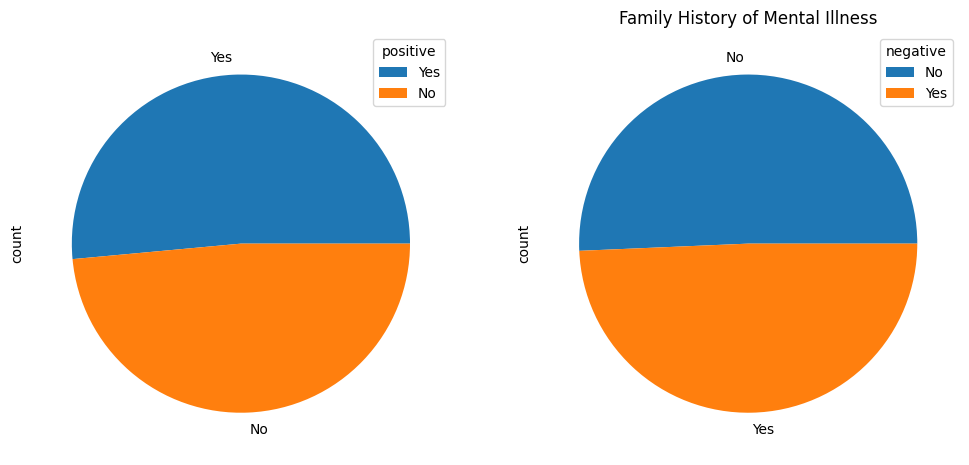

In [ ]:
for col in object_columns:
    plt.figure(figsize=(12,8))
    plt.subplot(1,2,1)
    positive_df[col].value_counts().sort_values(ascending=False)[:10].plot.pie()
    plt.legend(title='positive')
    plt.subplot(1,2,2)
    negative_df[col].value_counts().sort_values(ascending=False)[:10].plot.pie()
    plt.legend(title='negative')
    plt.title(col)
    plt.show()

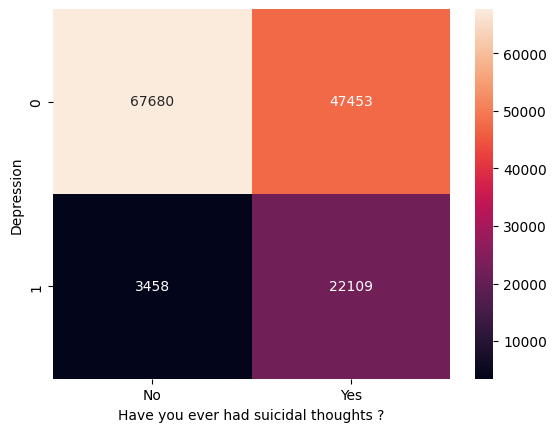

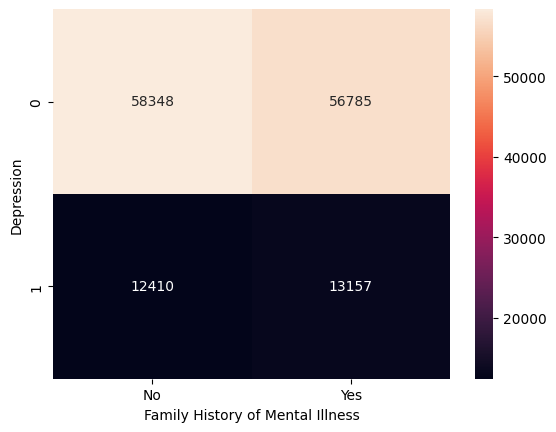

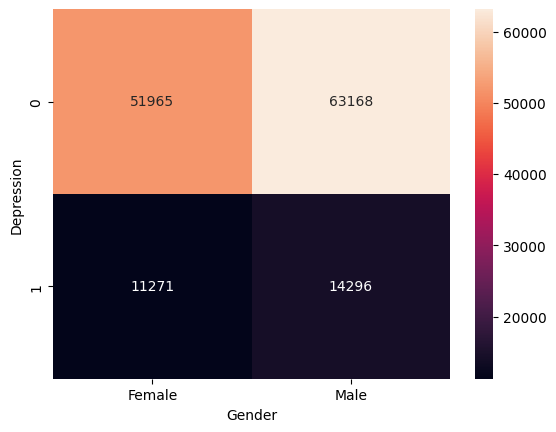

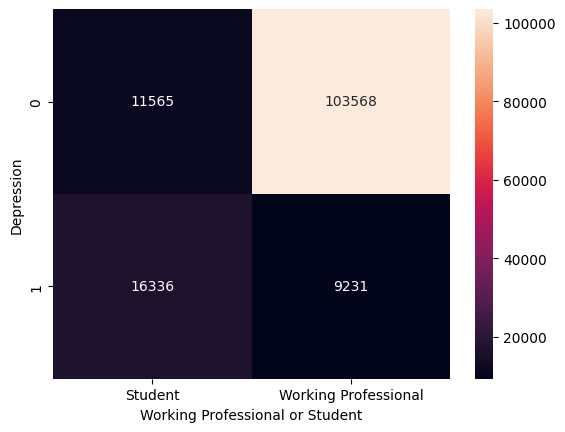

In [ ]:
for col in ['Have you ever had suicidal thoughts ?','Family History of Mental Illness','Gender','Working Professional or Student']:
    plt.figure()
    sns.heatmap(pd.crosstab(df[target_feature],df[col]),annot=True,fmt='d')

# **3. Analyse du fond complémentaire**



## **3.1 Relation variables / variables**

### **A. Float / Float**

<Axes: >

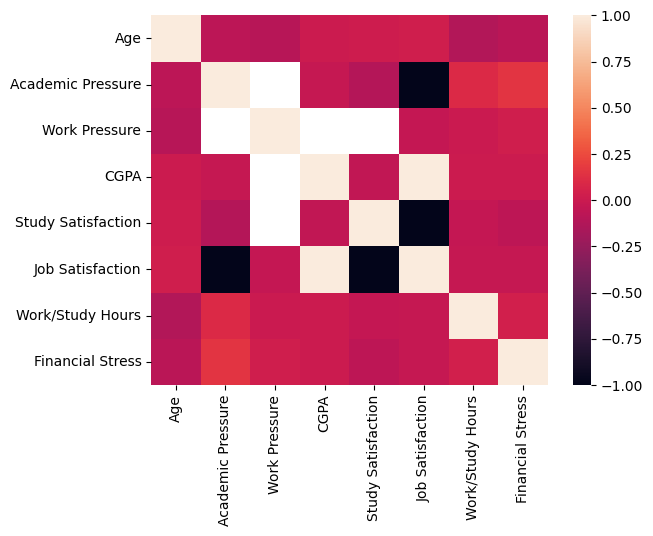

In [ ]:
sns.heatmap(df[float_columns].corr())

### **B. Age / Float**

<Figure size 640x480 with 0 Axes>

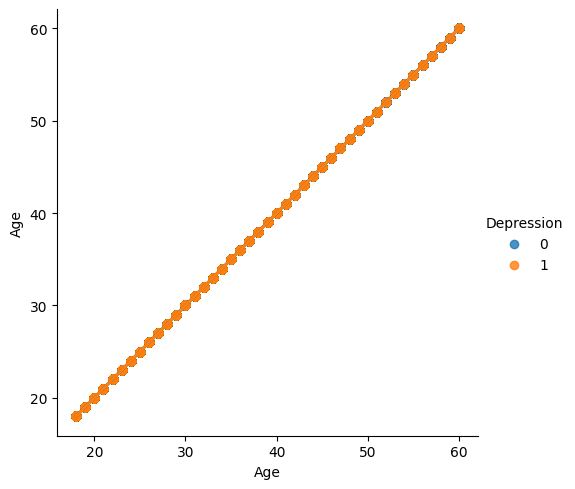

<Figure size 640x480 with 0 Axes>

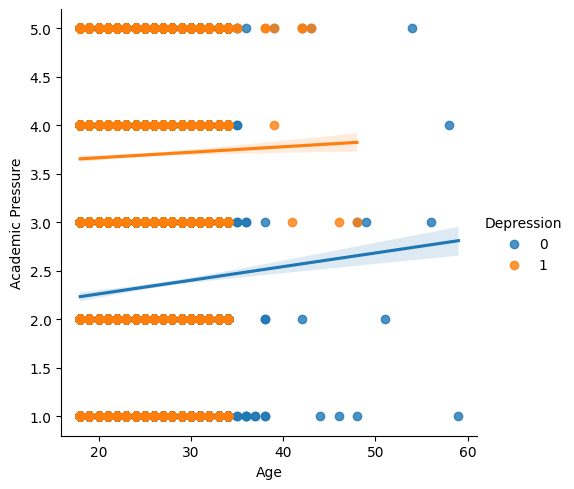

<Figure size 640x480 with 0 Axes>

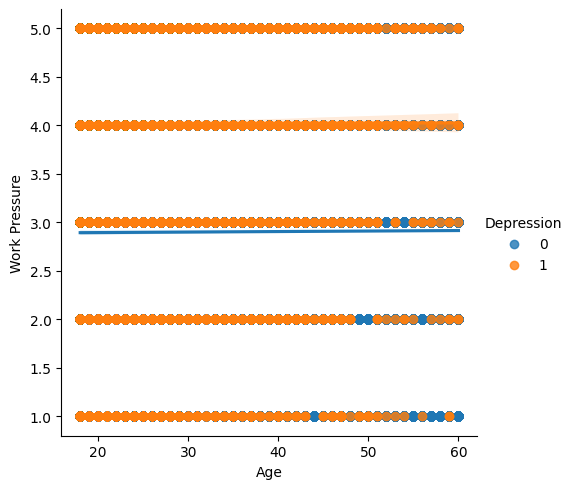

<Figure size 640x480 with 0 Axes>

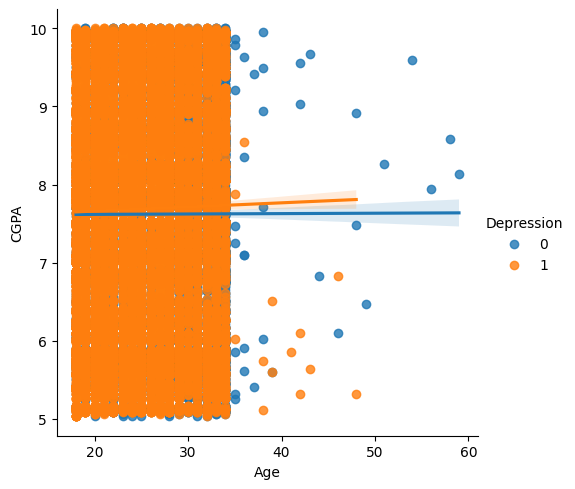

<Figure size 640x480 with 0 Axes>

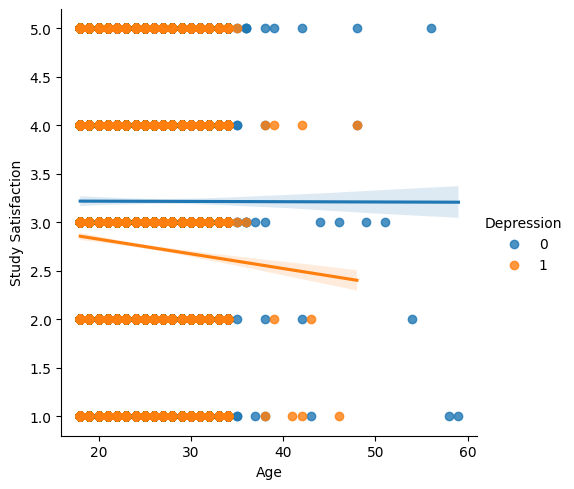

<Figure size 640x480 with 0 Axes>

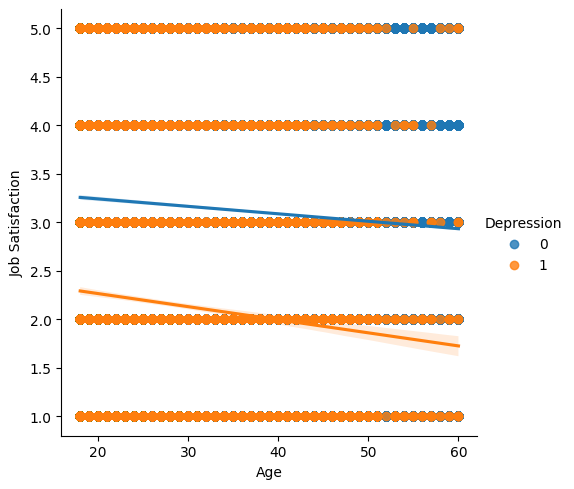

<Figure size 640x480 with 0 Axes>

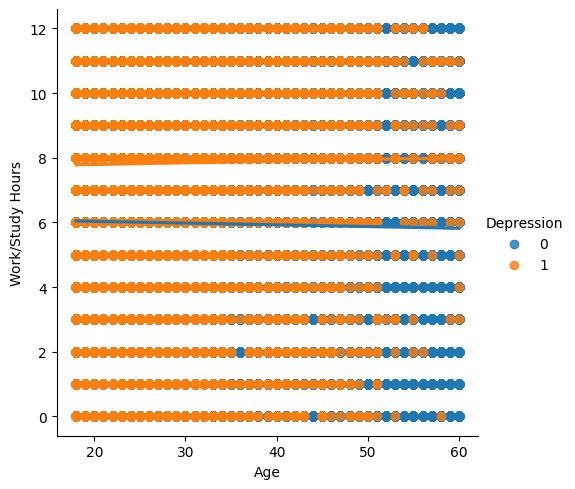

<Figure size 640x480 with 0 Axes>

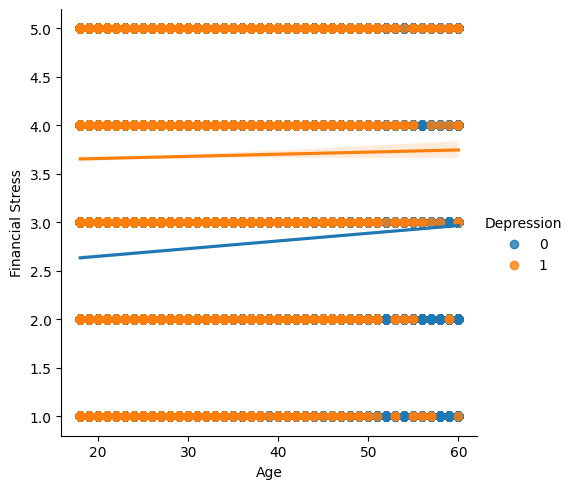

In [ ]:
for col in float_columns:
    plt.figure()
    sns.lmplot(x='Age',y=col,hue=target_feature,data=df)

In [ ]:
df.select_dtypes(include=['number']).corr()['Age'].sort_values()
#très faible corrélation entre l'âge et le reste

,Age
Depression,-0.564671
Work/Study Hours,-0.118356
Work Pressure,-0.098924
Financial Stress,-0.083589
Academic Pressure,-0.075956
CGPA,0.005129
Study Satisfaction,0.008862
Job Satisfaction,0.030793
Age,1.000000


### **C. Sommeil / Float**

In [ ]:
def sommeil(df):
    if df['Sleep Duration']in['Less than 5 hours','1-2 hours','2-3 hours'
 '3-4 hours','4-5 hours','1-3 hours','3-6 hours']:
        return '<5 heures'
    elif df['Sleep Duration']in['5-6 hours','4-6 hours']:
        return '5-6 heures'
    elif df['Sleep Duration']in['7-8 hours','6-8 hours','6-7 hours','Moderate','9-6 hours','8 hours']:
        return '6-8 heures'
    elif df['Sleep Duration']in['More than 8 hours','10-11 hours', '8-9 hours' , '9-11 hours']:
        return '>8 heures'
    else:
        return 'inconnu'

In [ ]:
df['sommeil']=df.apply(sommeil,axis=1)

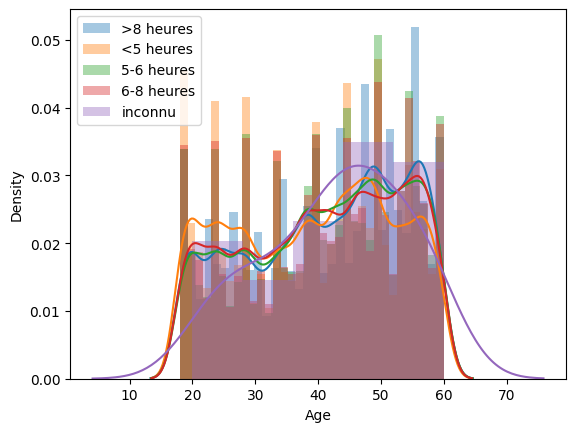

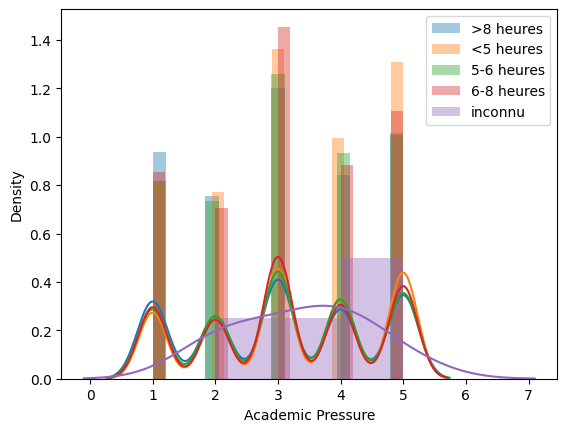

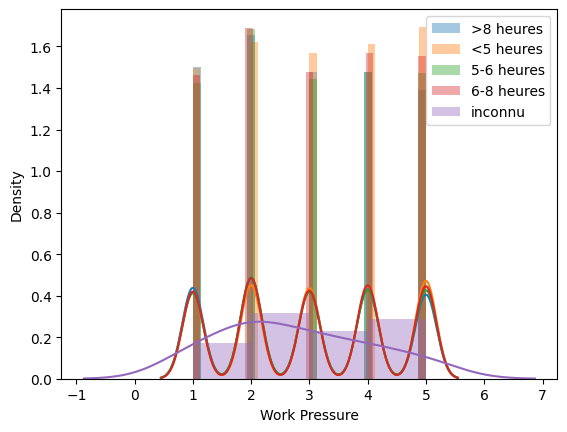

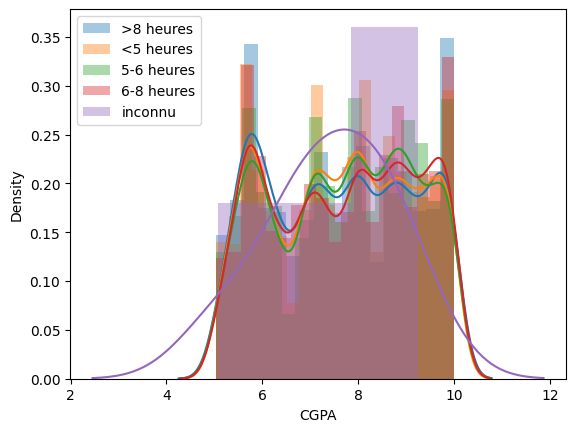

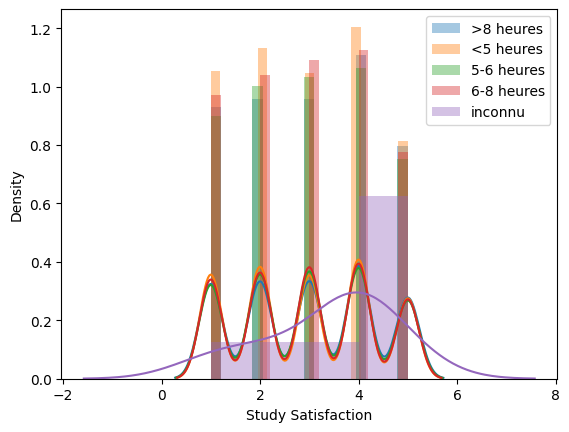

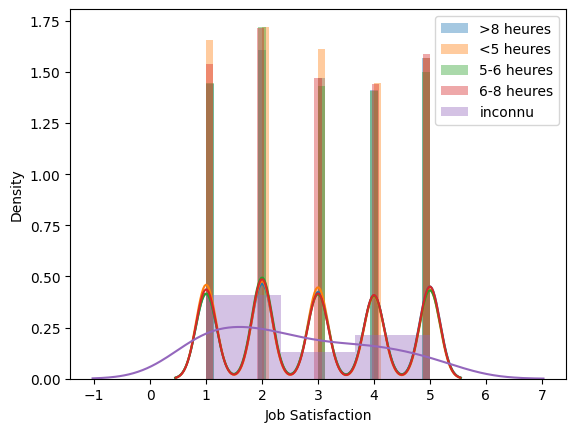

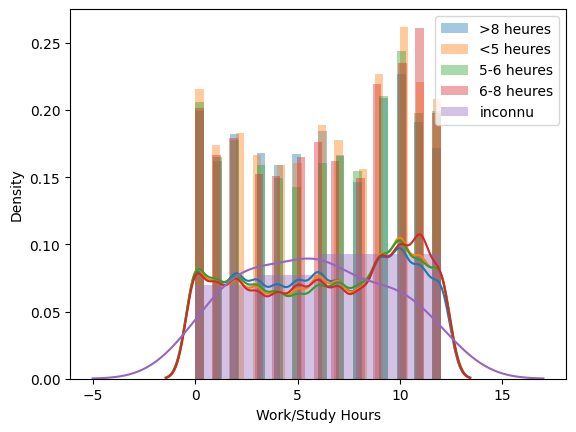

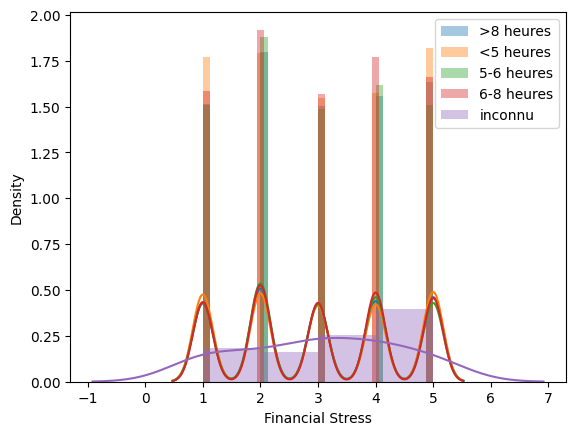

In [ ]:
for col in float_columns:
    plt.figure()
    for cat in df['sommeil'].unique():
        sns.distplot(df[df['sommeil']==cat][col],label=cat)
    plt.legend()

### **D. Working Professional or Student / Float**

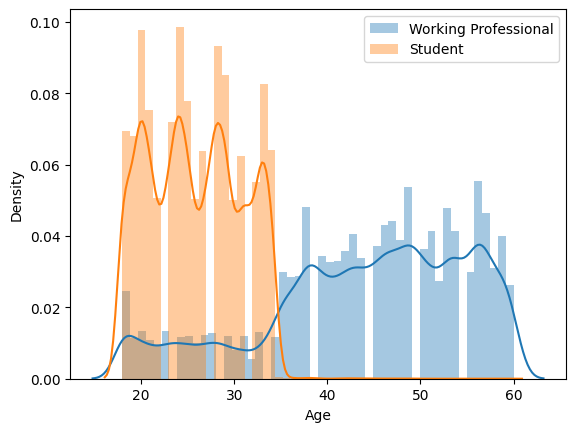

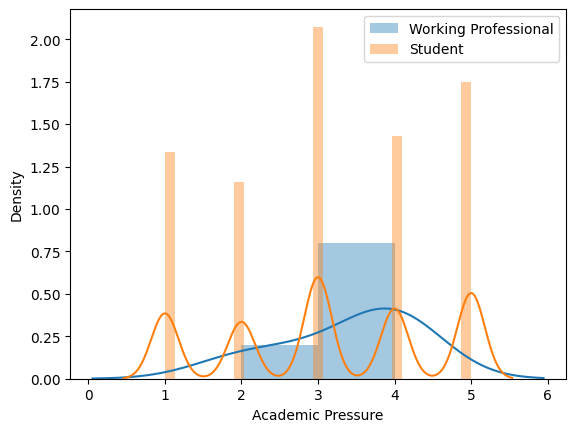

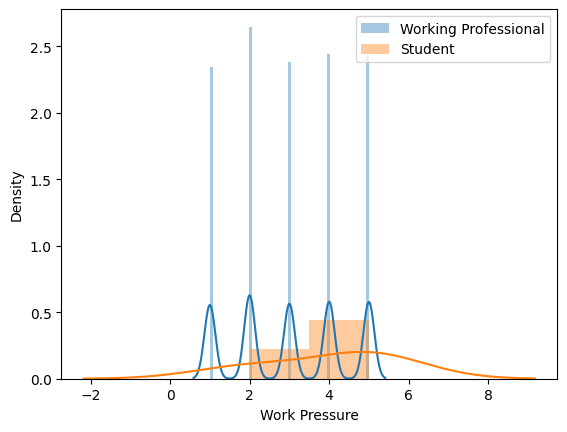

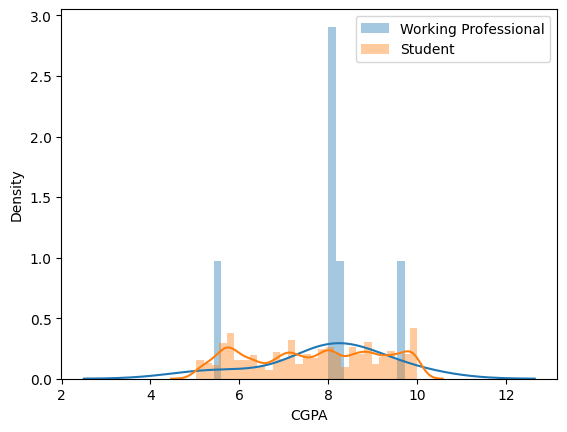

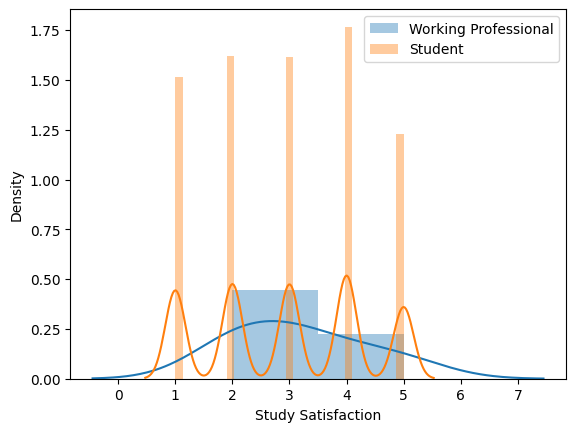

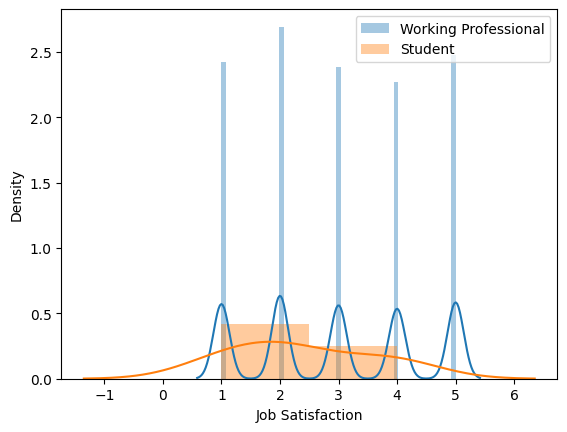

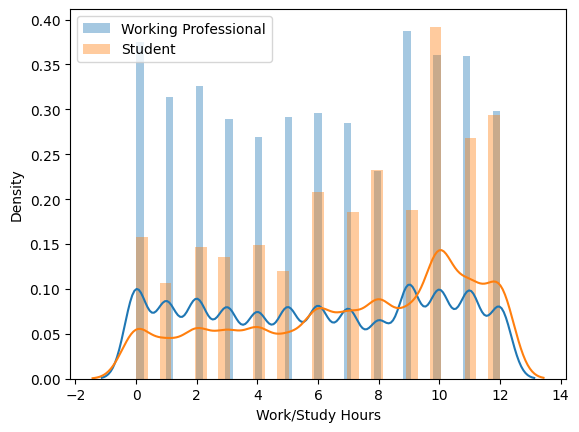

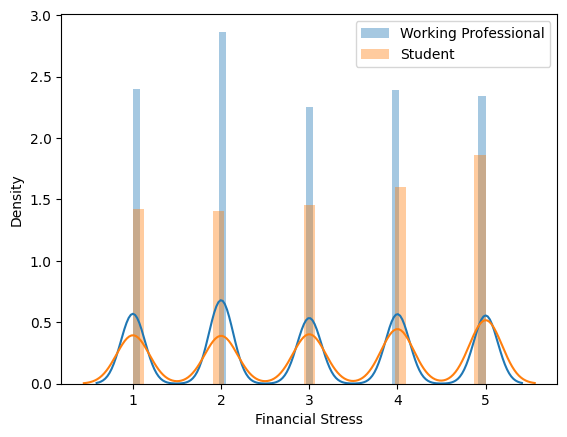

In [ ]:
for col in float_columns:
    plt.figure()
    for cat in df['Working Professional or Student'].unique():
        sns.distplot(df[df['Working Professional or Student']==cat][col],label=cat)
    plt.legend()

## **3.2 Analyse des valeurs manquantes (NaN)**

In [ ]:
print('Combien de lignes restent si on enlevait toutes celles avec un NaN : \n')
df.dropna().count()

Combien de lignes restent si on enlevait toutes celles avec un NaN : 



,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0


In [ ]:
df1=df[job_columns]
df1['Depression']=df[target_feature]

print('Si on ne prend que les job_columns, les proportions de Depression sont :\n')
df1.dropna()['Depression'].value_counts(normalize=True)

Si on ne prend que les job_columns, les proportions de Depression sont :



,proportion
Depression,
0,0.918246
1,0.081754


In [ ]:
df2=df[studies_columns]
df2['Depression']=df[target_feature]

print('Si on ne prend que les studies_columns, les proportions de Depression sont :\n')
df2.dropna()['Depression'].value_counts(normalize=True)

Si on ne prend que les studies_columns, les proportions de Depression sont :



,proportion
Depression,
1,0.58558
0,0.41442


## **3.3 Hypothèses nulles**

**Test de Student**

**H0= la durée de sommeil est EGALE chez les individus déprimés et non déprimés**

In [ ]:
def diet_float(df):
    if df['Dietary Habits']in['Healthy', 'Moderate', 'More Healthy']:
        return 1
    elif df['Dietary Habits']in ['Unhealthy', 'Less than Healthy', 'No Healthy', 'Less Healthy']:
        return 2
    else:
        return 'Unknown'

In [ ]:
df['diet_float']=df.apply(diet_float,axis=1)

In [ ]:
def sommeil_float(df):
    if df['sommeil']=='<5 heures':
        return 1
    elif df['sommeil']=='5-6 heures':
        return 2
    elif df['sommeil']=='6-8 heures':
        return 3
    elif df['sommeil']=='>8 heures':
        return 4
    else:
        return 'Unknown'

In [ ]:
df['sommeil_float']=df.apply(sommeil_float,axis=1)